### Loading the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

### 1. How many different Genre of Movies are there in this dataset?

In [2]:
#Import the dataset and get the columns present
df = pd.read_csv("imdb.csv")
df.columns

Index(['id', 'name', 'year', 'rating', 'certificate', 'duration', 'genre',
       'votes', 'gross_income', 'directors_id', 'directors_name', 'stars_id',
       'stars_name', 'description'],
      dtype='object')

In [34]:
unique_genres = set(df['genre'].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())
print('No. of uniques genres present is:') 
print(len(unique_genres))
print('Unique genre sorted in ascending order:')
print(list(sorted(unique_genres)))
# 26 unique genres :
#'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
#'family', 'fantasy', 'filmnoir', 'gameshow', 'history', 'horror', 'music', 'musical', 'mystery',
#'news', 'realitytv', 'romance', 'scifi', 'short', 'sport', 'thriller', 'war', 'western'

No. of uniques genres is:
26
Unique genre sorted in ascending order:
['action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'filmnoir', 'gameshow', 'history', 'horror', 'music', 'musical', 'mystery', 'news', 'realitytv', 'romance', 'scifi', 'short', 'sport', 'thriller', 'war', 'western']


/var/folders/2f/4n9l1s8x6nqf50p8qj8j0cz80000gn/T/ipykernel_87011/1399039298.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  unique_genres = set(df['genre'].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())


### 2. Find the most voted Movie in the dataset

In [36]:
print('Max votes = ' + df['votes'].max())
movieName = df[df['votes'] == df.max()['votes']].name
print('Most voted movie is = ' + movieName) 
#'Running Scared' with 99981 votes

Max votes = 99981
6443    Most voted movie is = Running Scared
Name: name, dtype: object


### 3. Which Genre is having most number of Movies in the dataset?

In [5]:
list1 = df['genre'].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum()
genres_with_movie_count = Counter(list1)
print('All Genres with their movies counts are : ')
print(genres_with_movie_count)
# 'Drama' has the most number of movies - 9928

/var/folders/2f/4n9l1s8x6nqf50p8qj8j0cz80000gn/T/ipykernel_87011/2929831252.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  list1 = df['genre'].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum()


All Genres with their movies counts are : 
Counter({'drama': 9928, 'action': 5508, 'crime': 5444, 'comedy': 4901, 'thriller': 4299, 'adventure': 3543, 'horror': 3161, 'mystery': 2312, 'romance': 1840, 'biography': 1733, 'fantasy': 1520, 'scifi': 1445, 'music': 1281, 'animation': 1109, 'documentary': 1082, 'family': 1057, 'war': 866, 'western': 800, 'sport': 737, 'history': 552, 'filmnoir': 307, 'short': 257, 'musical': 156, 'news': 12, 'realitytv': 3, 'gameshow': 1})


### 4. Find the Disctribution of number of movies in each genre with bar graph

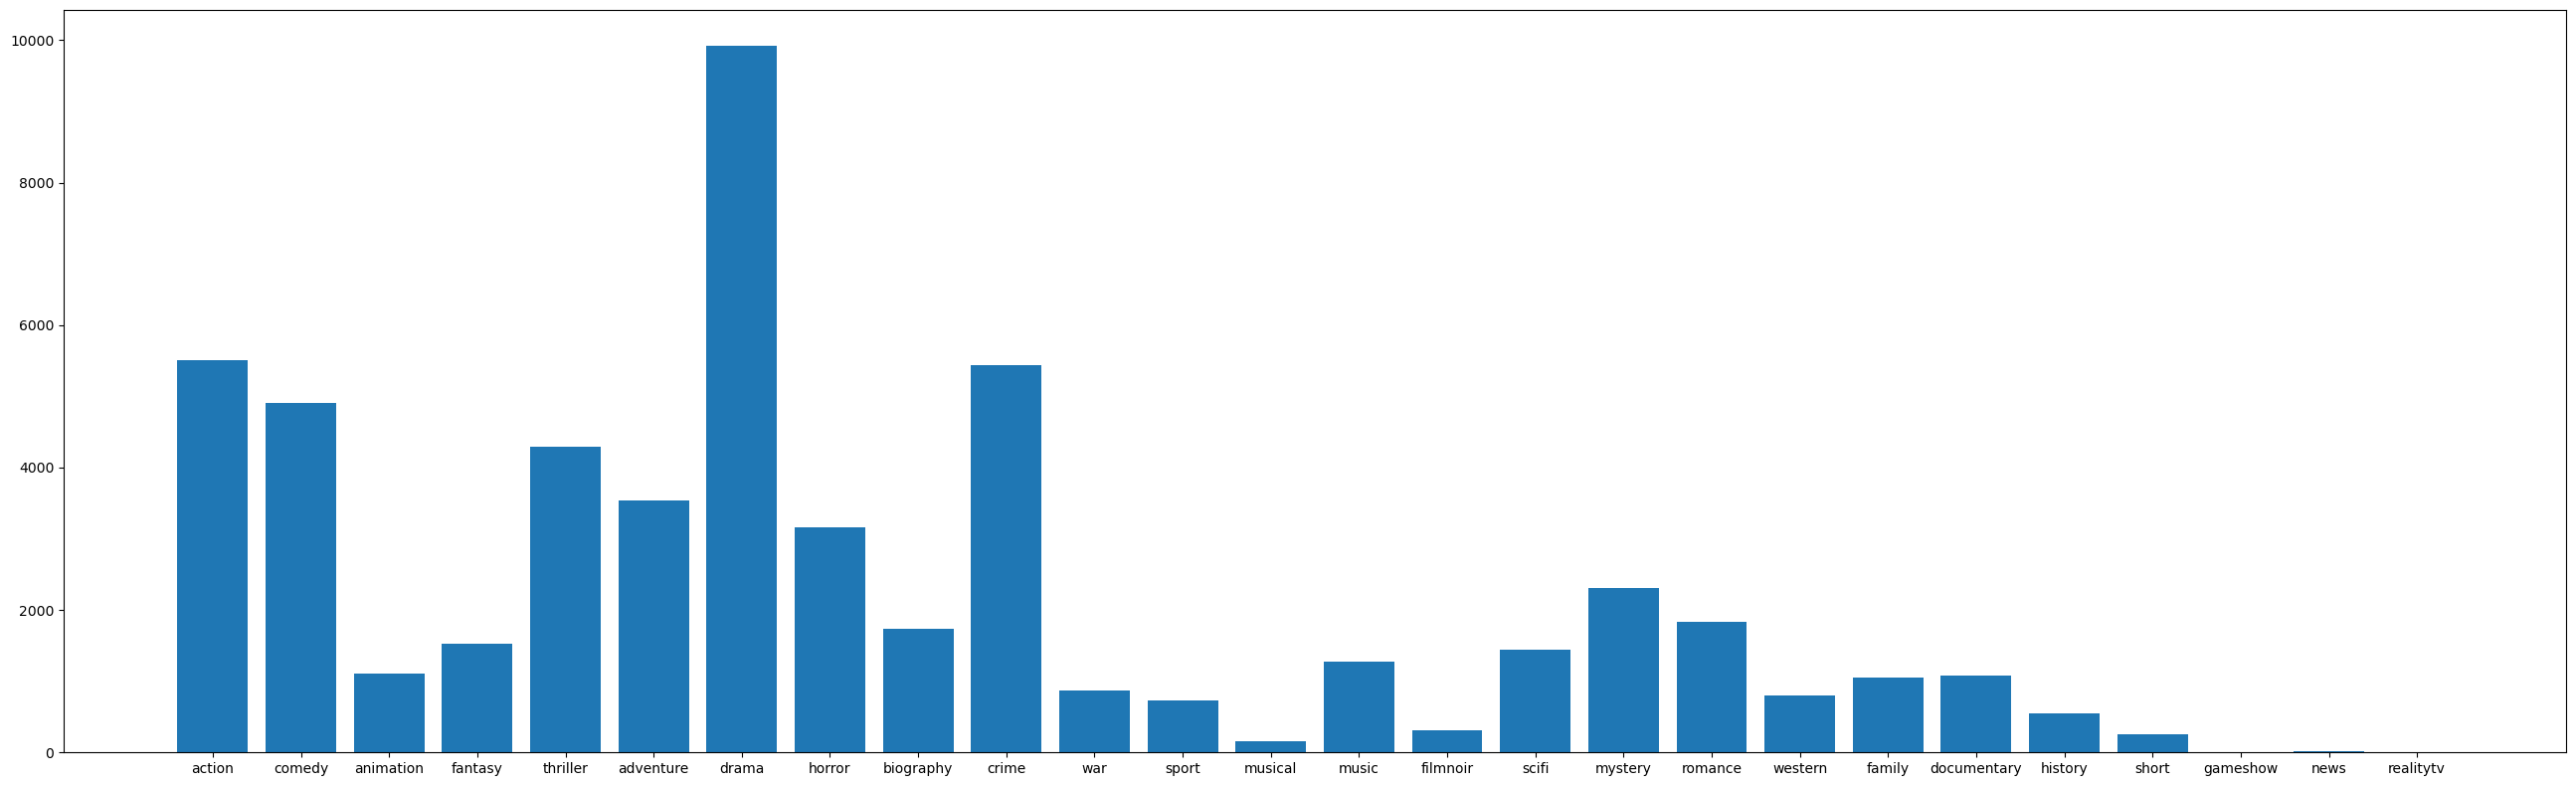

In [6]:
type(genres_with_movie_count)
# Set the figure size
plt.rcParams["figure.figsize"] = [26.00, 8.00]
plt.rcParams["figure.autolayout"] = True
plt.bar(genres_with_movie_count.keys(), genres_with_movie_count.values())

plt.show()

### 5. Plot top 10 Movies with maximum Gross-Income with Bar Graph

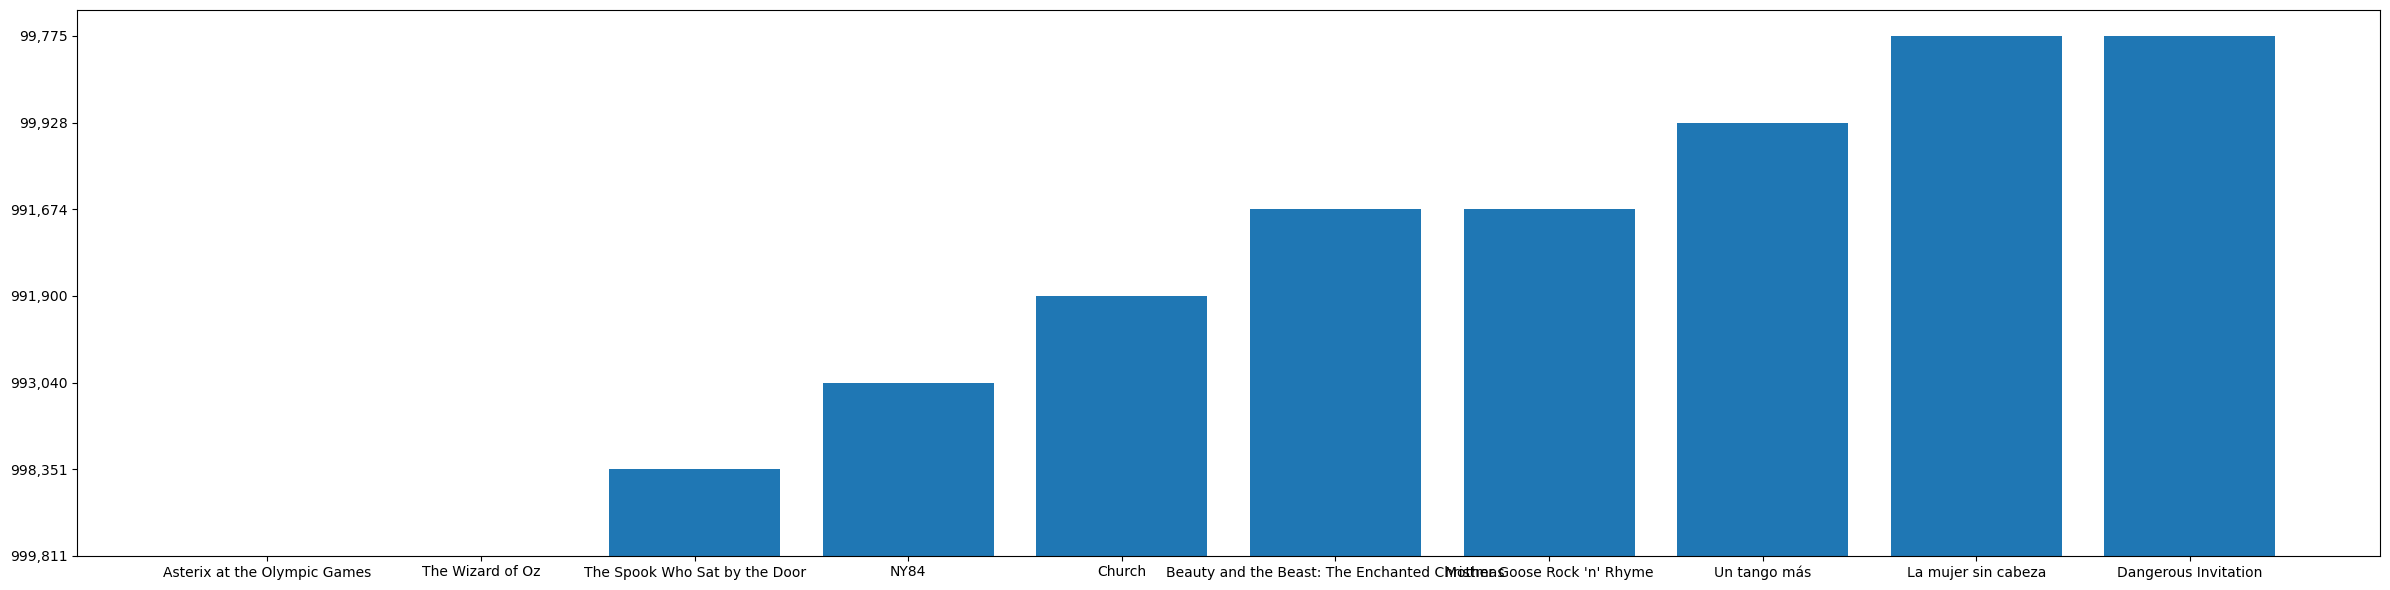

999,811


In [7]:
top10_gross_income = df.sort_values(['gross_income'], ascending=False).head(10)
X = top10_gross_income['name']
Y = top10_gross_income['gross_income']

# Set the figure size
plt.rcParams["figure.figsize"] = [24.00, 6.00]
plt.rcParams["figure.autolayout"] = True
plt.bar(X, Y)

plt.show()

print(df['gross_income'].max())

### 6. Whats the average duration of a movie in each genre in ascending order?

In [8]:
inner_dict = {'count':0, 'total_duration':0, 'average':0}
outer_dict = {}
final_dict = {}
for key in genres_with_movie_count:
    outer_dict[key] = {'count':0, 'total_duration':0, 'average':0}
    
    for index, row in df.iterrows():
        
        if (key in row['genre'].replace('-', '').lower()):
            #print(key)
            #print(row['genre'].replace('-', '').lower())
            inner_dict = outer_dict[key]
            inner_dict['count'] = inner_dict['count'] + 1
            inner_dict['total_duration'] = inner_dict['total_duration'] + int(row.duration.replace(' min','').replace(',',''))
            inner_dict['average'] = inner_dict['total_duration']/inner_dict['count']
            outer_dict[key] = inner_dict
            final_dict[key] = inner_dict['average']
    

sorted_dict = sorted(final_dict.items(), key=lambda item: item[1], reverse=True)
print(sorted_dict)



[('history', 116.8731884057971), ('musical', 110.49358974358974), ('biography', 109.62839007501442), ('war', 107.43071593533487), ('drama', 106.12651087832393), ('action', 105.59458968772694), ('romance', 105.26684782608696), ('sport', 103.80461329715061), ('music', 103.14736842105263), ('crime', 102.86921381337253), ('documentary', 100.85859519408503), ('mystery', 100.82179930795847), ('thriller', 100.72388927657595), ('adventure', 100.71888230313294), ('fantasy', 99.55592105263158), ('scifi', 98.919723183391), ('realitytv', 98.66666666666667), ('comedy', 96.27667822893287), ('western', 96.0525), ('family', 93.46452223273415), ('horror', 93.19835495096488), ('filmnoir', 88.26058631921823), ('gameshow', 85.0), ('news', 78.08333333333333), ('animation', 78.08115419296664), ('short', 16.8715953307393)]


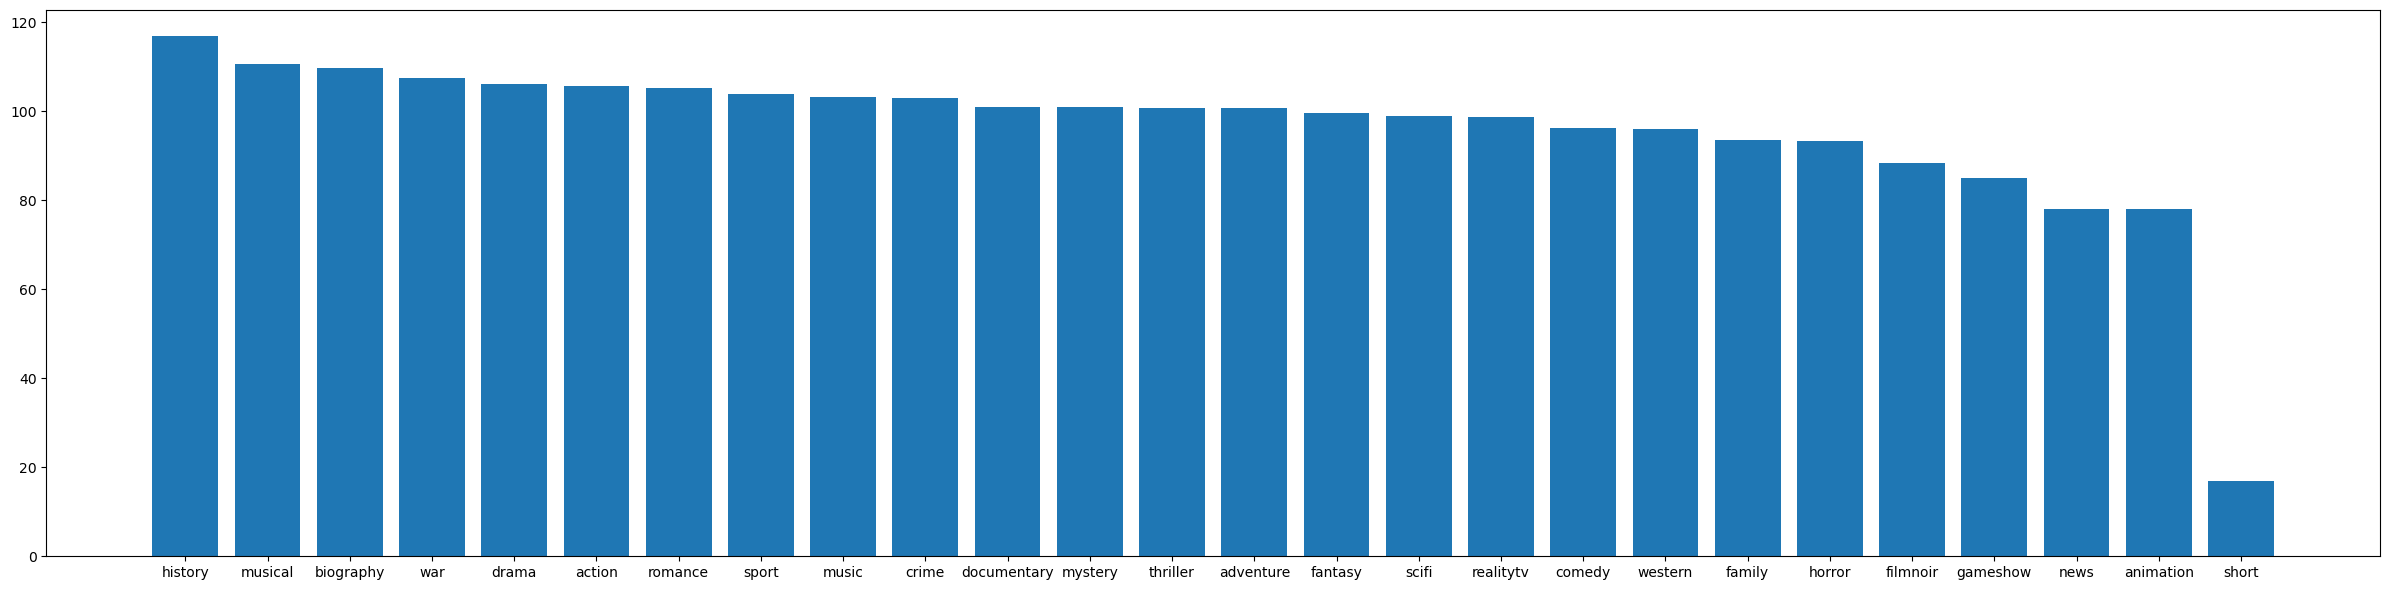

In [9]:


# Set the figure size
plt.rcParams["figure.figsize"] = [24.00, 6.00]
plt.rcParams["figure.autolayout"] = True
x, y = zip(*sorted_dict)

plt.bar(x, y)

plt.show()

### 7. Which Genre is the best to make a movie to get maximum gross income?

In [10]:
inner_dict = {'count':0, 'total':0, 'average':0}
outer_dict = {}
final_dict = {}
avg_dict = {}
for key in genres_with_movie_count:
    outer_dict[key] = {'count':0, 'total':0, 'average':0}
    
    for index, row in df.iterrows():
        
        if (key in row['genre'].replace('-', '').lower()):
            #print(key)
            #print(row['genre'].replace('-', '').lower())
            inner_dict = outer_dict[key]
            inner_dict['count'] = inner_dict['count'] + 1
            inner_dict['total'] = inner_dict['total'] + float(row['gross_income'].replace('$','').replace(',','').replace('M',''))
            inner_dict['average'] = inner_dict['total']/inner_dict['count']
            outer_dict[key] = inner_dict
            final_dict[key] = inner_dict['total']
            avg_dict[key] = inner_dict['average']
    

sorted_dict = sorted(final_dict.items(), key=lambda item: item[1], reverse=True)
print(sorted_dict)
# Action is the best genre with maximum gross income = 138052701745.05

[('action', 138052701745.05), ('adventure', 135297390096.18), ('drama', 118234202960.2), ('comedy', 102998298049.14), ('crime', 61877808212.0), ('thriller', 57249997466.07), ('scifi', 45212139633.02), ('animation', 39382103924.06), ('fantasy', 38971748011.05), ('horror', 33499612640.1), ('mystery', 29764872811.0), ('family', 24708509034.019997), ('romance', 19307524197.010002), ('biography', 18542624963.0), ('music', 14097677354.0), ('sport', 7892259631.070002), ('history', 6704535104.0), ('war', 5839997626.0), ('western', 5386471270.0), ('documentary', 3101823110.01), ('musical', 3003276970.0), ('short', 1211334508.2099998), ('filmnoir', 1007531411.0), ('news', 6741741.0), ('realitytv', 4092329.0), ('gameshow', 1338264.0)]


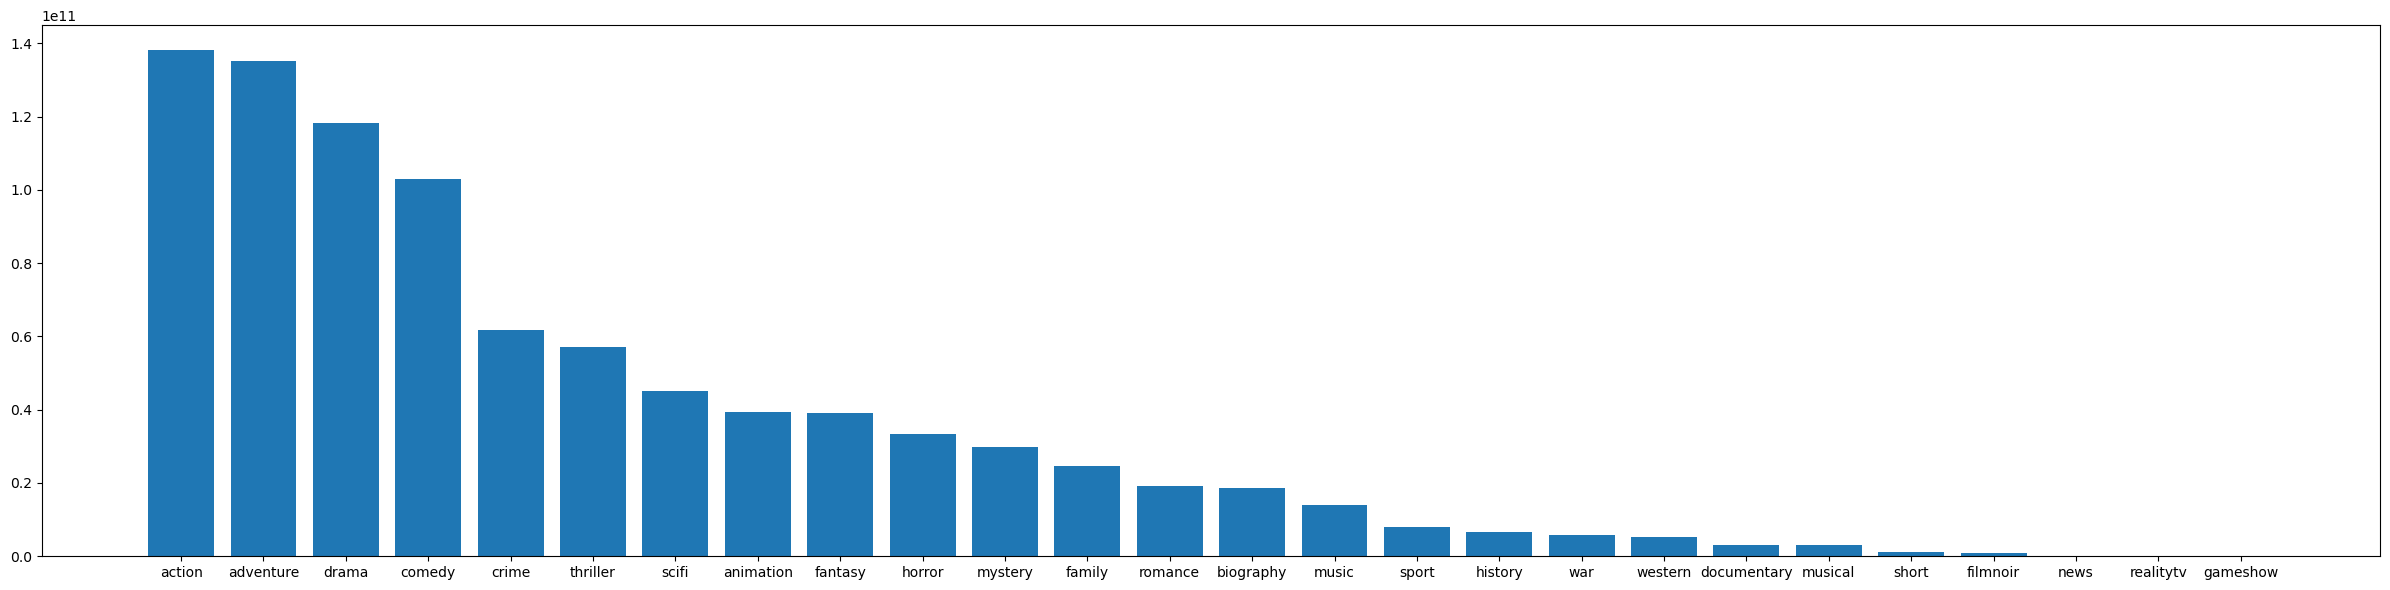

In [11]:
# Set the figure size
plt.rcParams["figure.figsize"] = [24.00, 6.00]
plt.rcParams["figure.autolayout"] = True
x, y = zip(*sorted_dict)

plt.bar(x, y)

plt.show()

### 8. Which Genre is the worst to make money from a movie?

In [12]:
# From the above graph 'gameshow' is the worst genre to make money for a movie
# gross_income = 1338264.0

### 9. Distribution of Average Gross Income of each genre?

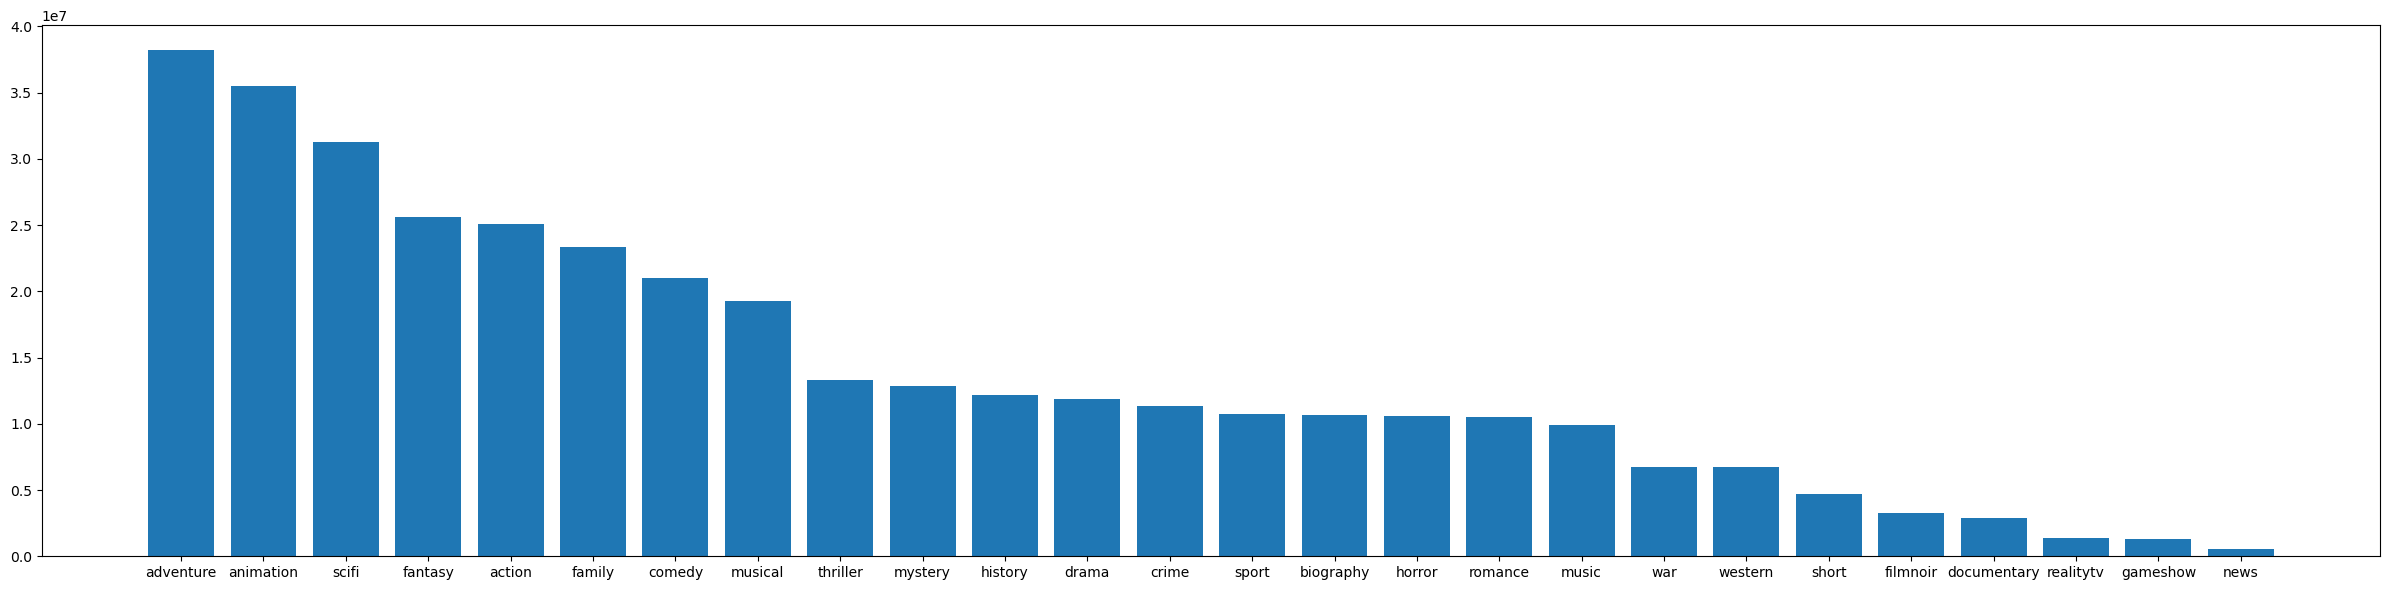

In [13]:
sorted_avg_dict = sorted(avg_dict.items(), key=lambda item: item[1], reverse=True)
plt.rcParams["figure.figsize"] = [24.00, 6.00]
plt.rcParams["figure.autolayout"] = True
x, y = zip(*sorted_avg_dict)

plt.bar(x, y)

plt.show()

### 10. Which two pairs of Genre is having maximum number of movies?

In [31]:
inner_dict = {'count':0}
outer_dict = {}
final_dict = {}

for key1 in genres_with_movie_count:
    for key2 in genres_with_movie_count:
        surpass = key2+key1
        if(key1 != key2):
            if(outer_dict.get(surpass) == None):
                key = key1 + key2
                outer_dict[key] = {'count':0}
                for index, row in df.iterrows():
        
                    if ( (key1 in row['genre'].replace('-', '').lower())
                       & (key2 in row['genre'].replace('-', '').lower())):
                #print(key1)
               # print(key2)
                #print(row['genre'].replace('-', '').lower())
                        inner_dict = outer_dict[key]
                        inner_dict['count'] = inner_dict['count'] + 1
                
                        outer_dict[key] = inner_dict
                        final_dict[key] = inner_dict['count']
            

{'actioncomedy': {'count': 1141}, 'actionanimation': {'count': 303}, 'actionfantasy': {'count': 317}, 'actionthriller': {'count': 977}, 'actionadventure': {'count': 1708}, 'actiondrama': {'count': 1976}, 'actionhorror': {'count': 360}, 'actionbiography': {'count': 88}, 'actioncrime': {'count': 1735}, 'actionwar': {'count': 133}, 'actionsport': {'count': 89}, 'actionmusical': {'count': 3}, 'actionmusic': {'count': 24}, 'actionfilmnoir': {'count': 3}, 'actionscifi': {'count': 537}, 'actionmystery': {'count': 142}, 'actionromance': {'count': 188}, 'actionwestern': {'count': 71}, 'actionfamily': {'count': 91}, 'actiondocumentary': {'count': 33}, 'actionhistory': {'count': 74}, 'actionshort': {'count': 43}, 'actiongameshow': {'count': 1}, 'actionnews': {'count': 0}, 'actionrealitytv': {'count': 0}, 'comedyanimation': {'count': 483}, 'comedyfantasy': {'count': 495}, 'comedythriller': {'count': 182}, 'comedyadventure': {'count': 1154}, 'comedydrama': {'count': 1294}, 'comedyhorror': {'count':

In [32]:
len(outer_dict)
#nC2 combinations should be there

325

In [33]:
sorted_dict = sorted(final_dict.items(), key=lambda item: item[1], reverse=True)
print(sorted_dict)
# Drama + Crime has the maximum no of movies = 3237

[('dramacrime', 3237), ('actiondrama', 1976), ('thrillerdrama', 1762), ('actioncrime', 1735), ('actionadventure', 1708), ('comedydrama', 1294), ('thrillercrime', 1257), ('dramabiography', 1204), ('dramaromance', 1188), ('dramamystery', 1183), ('comedycrime', 1170), ('comedyadventure', 1154), ('actioncomedy', 1141), ('actionthriller', 977), ('thrillerhorror', 944), ('adventuredrama', 929), ('thrillermystery', 740), ('crimemystery', 732), ('dramamusic', 709), ('dramahorror', 704), ('horrormystery', 684), ('dramawar', 674), ('animationadventure', 645), ('actionscifi', 537), ('fantasydrama', 519), ('comedyfantasy', 495), ('comedyanimation', 483), ('comedyhorror', 482), ('horrorscifi', 471), ('comedymusic', 456), ('biographydocumentary', 445), ('comedyfamily', 443), ('adventurefamily', 431), ('dramahistory', 428), ('comedyromance', 426), ('fantasyadventure', 386), ('dramasport', 383), ('actionhorror', 360), ('musicdocumentary', 329), ('fantasyhorror', 320), ('actionfantasy', 317), ('actiona